# Bharat Intern
### Task 3

### Submitted by : Aparna Vinod

## Handwritten Digit Recognition using Python

*Handwritten digit recognition is a classic machine learning algorithm where the goal is to develop a system that can accuartely identify and classify handwritten digits. We use MNIST dataset here, which consists of 28x28 pixel grayscale images of handwritten digits (0 through 9). Also we use a simple convolutional neural network (CNN) which is often used for image classification.*

### Importing necessary modules

In [40]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#### Importing the data 

In [74]:
#splitting between training and test sets
(x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Both training and testing sets contain images of handwritten digits along with their corresponsing labels.

In [75]:
def plot_input_img(i):
    plt.imshow(x_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()

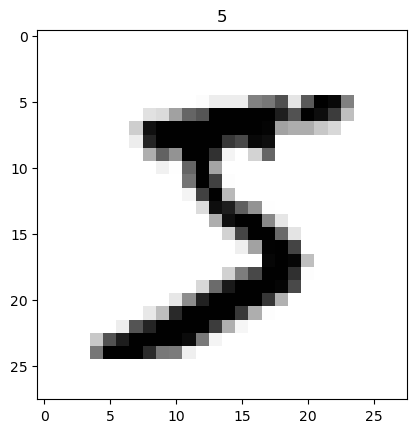

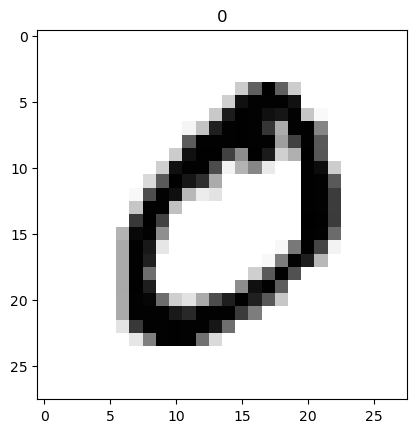

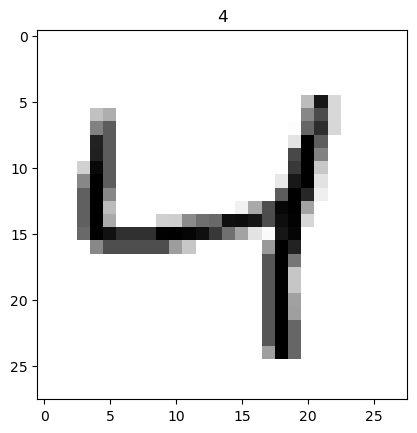

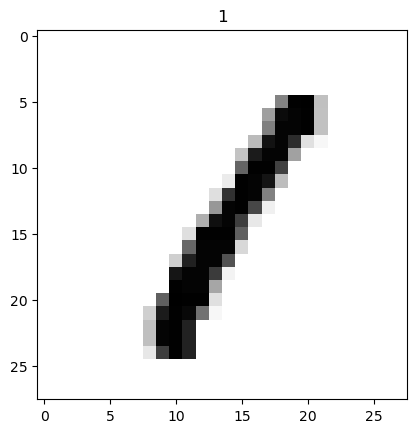

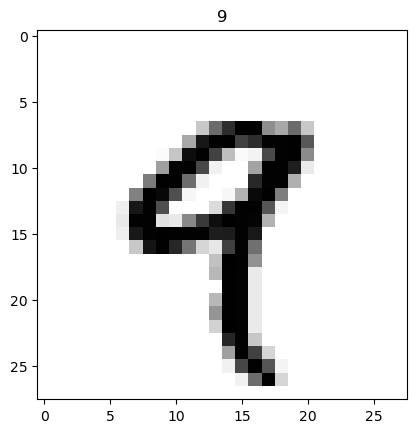

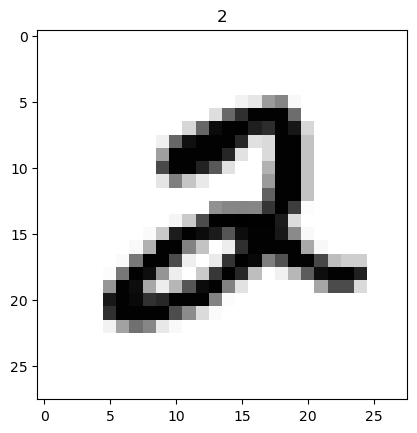

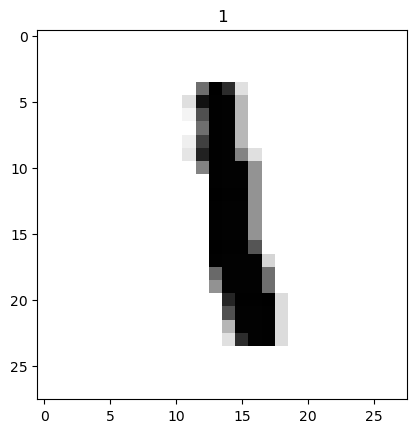

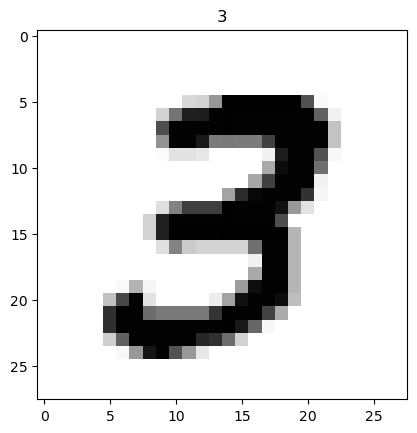

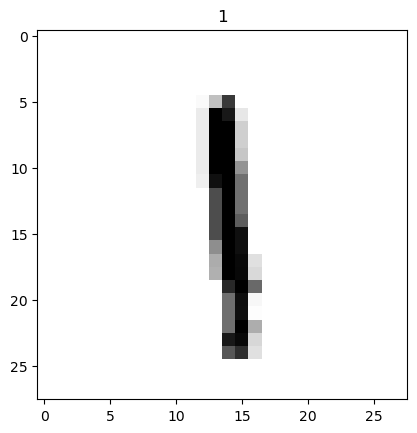

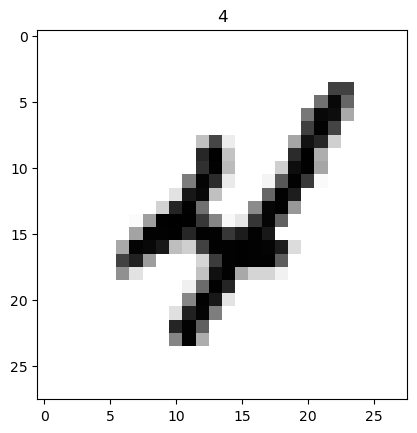

In [76]:
for i in range(0,10):
    plot_input_img(i)

### Data Preprocessing

In [77]:
# Preprocessing the data, making it ready for CNN model

#normalizing the image input
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

#reshaping the matrix to shape (60000,28,28,1)

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
input_shape = (28, 28, 1)

#convert class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


#10 is the number of classes (digits 0-9)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


The training process involves feeding the preprocessed training data to the model, adjusting the weights based on the calculated loss and iterating through multiple epochs.

In [78]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Building the CNN Model 

In [90]:
#Creating the CNN Model

model = Sequential()

#Sequential model helps you build a nueral network layer by layer

model.add(Conv2D(32, (3,3), activation = 'relu',
                 input_shape = input_shape))
model.add(MaxPooling2D ((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D (pool_size = (2,2)))


model.add(Flatten()) #to flatten 2D feature maps into a 1D Vector

#applying the dropout regularization technique to prevent overfitting
model.add(Dropout(0.5))


model.add(Dense(10, activation = 'softmax'))

#softmax activation function produces probability scores for each class

In [91]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_17 (Dropout)        (None, 1600)            

In [101]:
model.compile(loss = keras.losses.categorical_crossentropy, 
              optimizer='adam',
              metrics = ['accuracy'])

In [97]:
#Callbacks

from keras.callbacks import EarlyStopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_acc', min_delta = 0.05, patience = 3,
                   verbose = 1)
mc = ModelCheckpoint(filepath = 'modelweights', monitor = 'val_accuracy',
                    save_best_only = True, verbose = 1)

### Training the model

In [102]:
mod = model.fit(x_train, y_train, epochs = 5, batch_size = 32,
                validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 53s 39ms/step - loss: 0.2432 - accuracy: 0.9258 - val_loss: 0.0870 - val_accuracy: 0.9748
Epoch 2/5
1313/1313 [==============================] - 48s 37ms/step - loss: 0.0944 - accuracy: 0.9701 - val_loss: 0.0619 - val_accuracy: 0.9819
Epoch 3/5
1313/1313 [==============================] - 48s 37ms/step - loss: 0.0736 - accuracy: 0.9771 - val_loss: 0.0511 - val_accuracy: 0.9839
Epoch 4/5
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0637 - accuracy: 0.9798 - val_loss: 0.0467 - val_accuracy: 0.9858
Epoch 5/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0548 - accuracy: 0.9822 - val_loss: 0.0430 - val_accuracy: 0.9871


### Evaluating the model 

In [103]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Test loss:", test_loss)

313/313 [==============================] - 4s 12ms/step - loss: 0.0335 - accuracy: 0.9883
Test Accuracy: 0.9883000254631042
Test loss: 0.03348507359623909


### Making predictions 

In [104]:
pred = model.predict(x_test)  #testing with unseen data

313/313 [==============================] - 4s 12ms/step


In [109]:
readable_pred = np.argmax(y_test, axis = 1)

classlabels = ["Zero", "One", "Two", "Three","Four", "Five","Six", "Seven", "Eight","Nine"]

predicted_classes = [classlabels[predict] for predict in readable_pred]

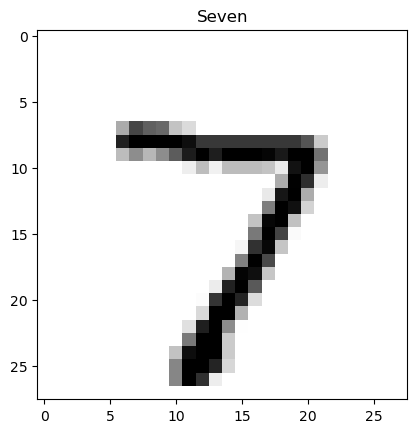

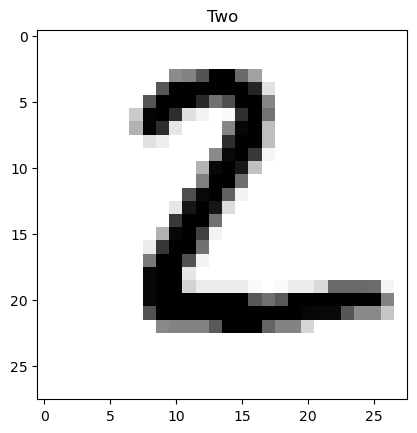

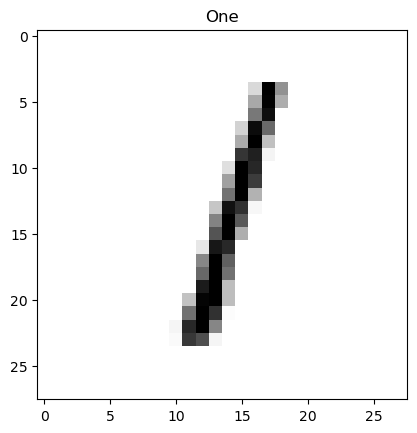

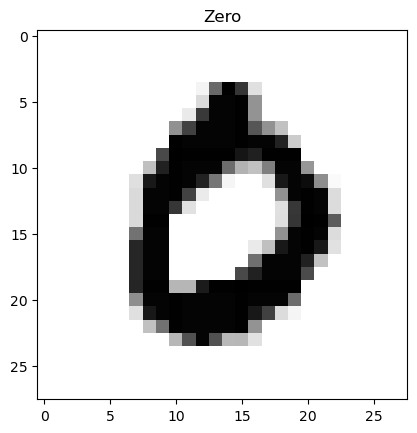

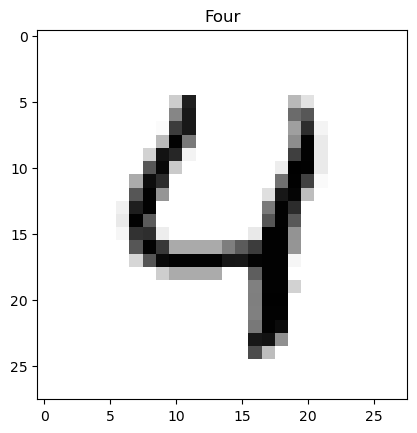

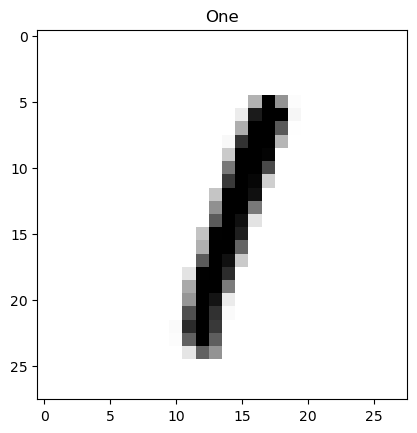

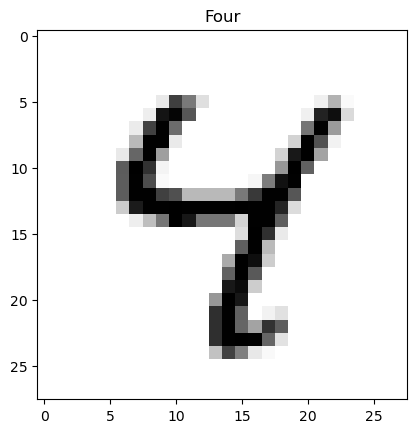

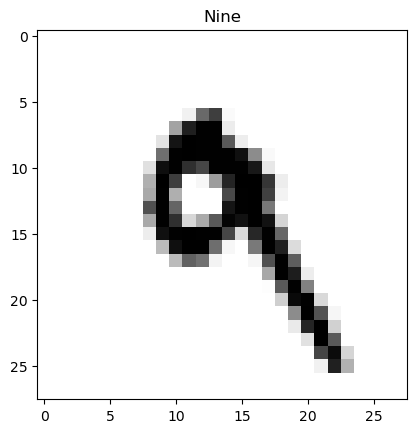

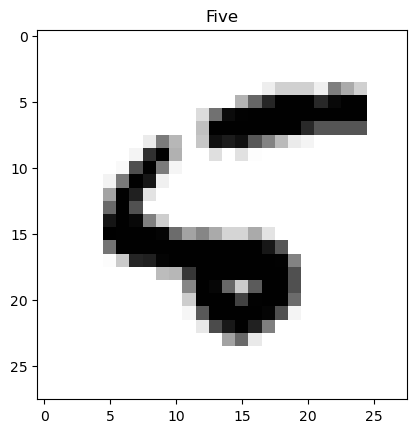

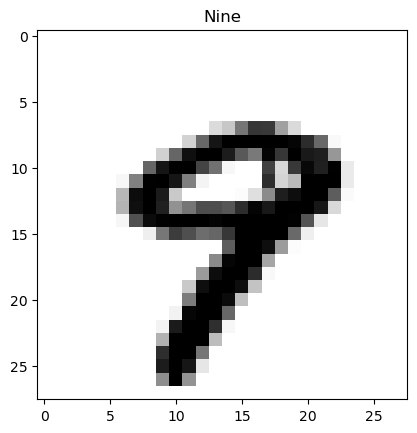

In [110]:
#VISUALIzATION

def output_img(i):
    plt.imshow(x_test[i],cmap = 'binary')
    plt.title(predicted_classes[i])
    plt.show()
    
for i in range(10):
    output_img(i)

**This python program is an end-to-end implementation of a handwritte digit recognition system using a CNN.
It covers data-loading, preprocessing, model building, training, evalutaion and visualization, providing a comprehensive understanding  of the entire workflow in a data science project.**